# 911 Calls Capstone Project

The <b>911 Calls Capstone Project</b> focuses on trying to implement all Data Analysis and Visualization techniques picked up so far in the course (<b><i>"Python for Data Science and Machine Learning Bootcamp"</i> | Pierian Data</b>). We'll be using the [911 Calls Kaggle Dataset](https://www.kaggle.com/mchirico/montcoalert) to analyze some 911 call data.

## Data and Setup

<b>We'll start by importing all the libraries we'll need for analyzing the dataset: </b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>And because we want to view these visualizations from within the notebook we'll use the following command: </b>

In [3]:
%matplotlib inline 

<b>The next step is to read in the csv file as a dataframe. We'll call it "df": </b>

In [4]:
df = pd.read_csv('911.csv')

<b>It's usually a good idea to look at the dataframes raw, stripped down information. It's a good way to get an idea of what operations you'll maybe want to perform on the dataframe as well as the methods. Knowing the amount of rows and columns as well as datatypes involved makes things a lot easier. We do this with the following command:</b>

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<b>Checking the head of the dataframe is also help you get an idea of what the dataframe looks like:</b>

In [208]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

<b>This is where we'll actually begin to analyze some data. The overall objective of Data Analysis and Visualization is to tell some sort of story using the data. This is what I'll attempt to do here. So to start, we'll focus on the more basic questions first.</b>

<b>Since we're working with Call Data, one good (basic) question to ask would be the following:</b>

1. What are the top 5 zipcodes for 911 calls? 

In [209]:
# Like always take the index (using the column name) of the dateframe that's your focus
# and use methods on the column to pull these values.
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<b>We may also be interested in the towns that are responsible for the most 911 calls.</b>

2. What are the top 5 townships (twp) for 911 calls?

In [210]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<b>We could also consider looking at the number of unique title codes. We can see the number of unique reasons for which calls were made.</b>

3. Take a look at the 'title' column, how many unique title codes are there?

In [211]:
df['title'].nunique()

110

## Creating new features

<b>There are cases where you'll have to modify an existing dataframe, rearranging or adding columns, to get more information out of the data in the dataframe. In this case you'll find that we'll be adding a column to the  dataframe and by doing so we can determine the most common reason people call the police in <i>Montgomery County, PA</i>.</b>

4. In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 

$$\textbf{For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.}$$

In [212]:
# We create a variable "df['Reason']" which will act as our new column. 
# Assignment to a column that doesn't exist creates the column.
# We take the "df['title']" column apply a lambda function to it using the apply method. 
# The lambda function takes the "x" element in the Title column and splits the string on either
# side of the':', and creates a list. 

df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

<b>On top of creating this new column, we're also interested in finding out the most common reasons for 911 calls.</b>

5. What is the most common Reason for a 911 call based off of this new column? 

In [213]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<b>I checked to see how many unique values are in the "Reason" column to see if I needed to use the ".head()" function like above but there's only three unique values within this column.</b>

In [214]:
df['Reason'].nunique()

3

<b>Tables are fine and dandy, and are a good way to organize data. However, pictures are worth a thousand words and viewing our data graphically allows us to gain more insight about the dataset. So from this point forwards we'll be including visualizations using seaborn (and other visualization libraries).</b>

5. Now use seaborn to create a countplot of 911 calls by Reason.

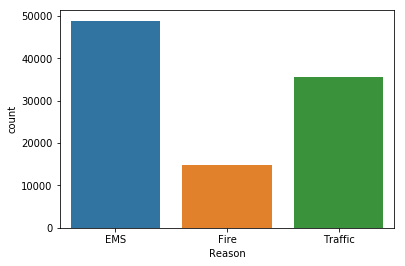

In [215]:
sns.countplot(df['Reason'], data= df)

6. Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? 

In [216]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [217]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

In [218]:
time = df['timeStamp'].iloc[99463]
time.hour

9

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [219]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

In [220]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

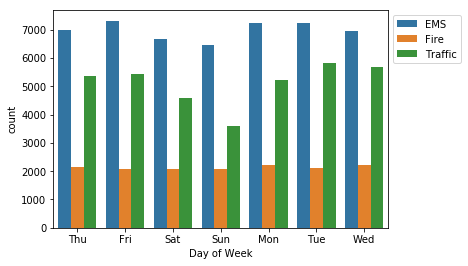

In [221]:
sns.countplot(x= 'Day of Week', data= df, hue= 'Reason')

# Moves the Legend to the right-hand corner
plt.legend(bbox_to_anchor= (1,1))

**Now do the same for Month:**

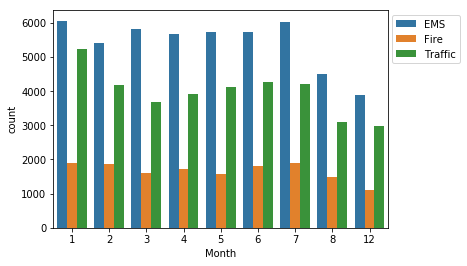

In [222]:
sns.countplot(x= 'Month', data= df, hue= 'Reason')

# Moves the Legend to the right-hand corner
plt.legend(bbox_to_anchor= (1.23,1))

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [223]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

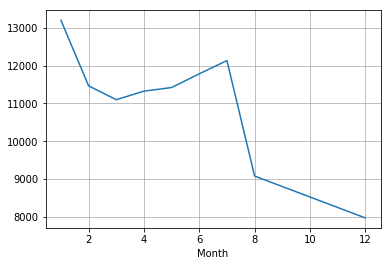

In [224]:
byMonth['lat'].plot(grid= True)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

/Users/Chris/anaconda/envs/ml_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


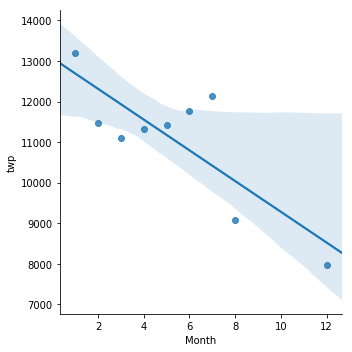

In [225]:
sns.lmplot(x='Month', y= 'twp', data= byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [246]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [238]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


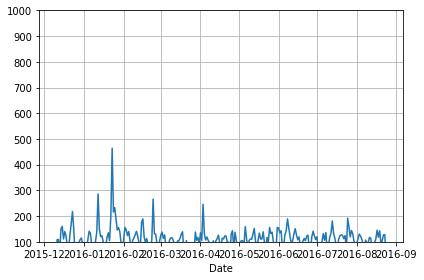

In [259]:
byDate['zip'].plot(grid= True, ylim= (100, 1000))

# Stops Overlap on axis
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

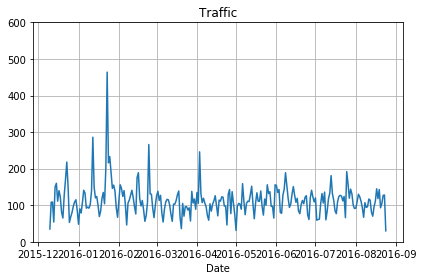

In [260]:
byDate = df[df['Reason'] == 'Traffic'].groupby('Date').count()
byDate['zip'].plot(grid= True, ylim= (0, 600))

# Creates Title7
plt.title('Traffic')

# Stops Overlap on axis
plt.tight_layout()

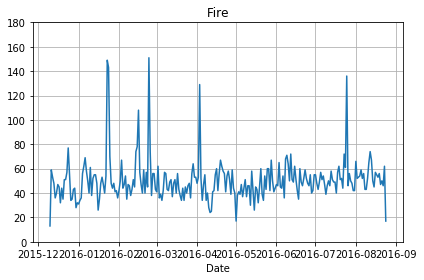

In [262]:
byDate = df[df['Reason'] == 'Fire'].groupby('Date').count()
byDate['zip'].plot(grid= True, ylim= (0, 180))

# Creates Title
plt.title('Fire')

# Stops Overlap on axis
plt.tight_layout()

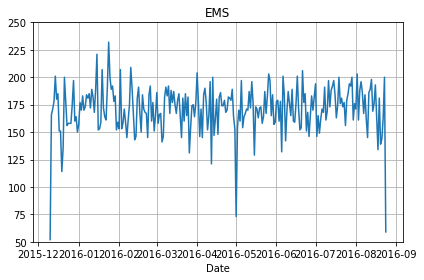

In [263]:
byDate = df[df['Reason'] == 'EMS'].groupby('Date').count()
byDate['zip'].plot(grid= True, ylim= (50, 250))

# Creates Title
plt.title('EMS')

# Stops Overlap on axis
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

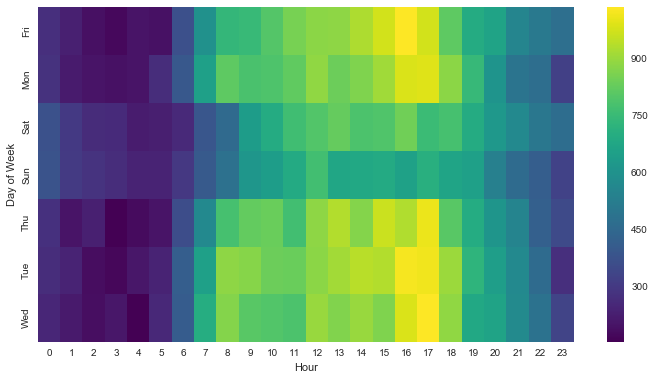

** Now create a clustermap using this DataFrame. **

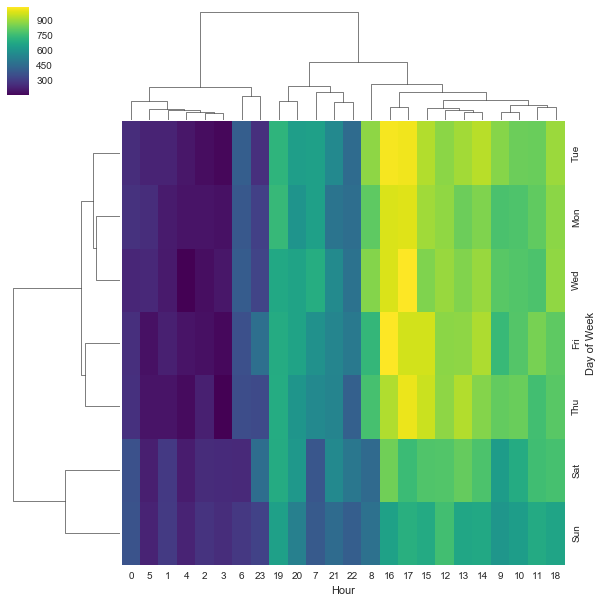

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


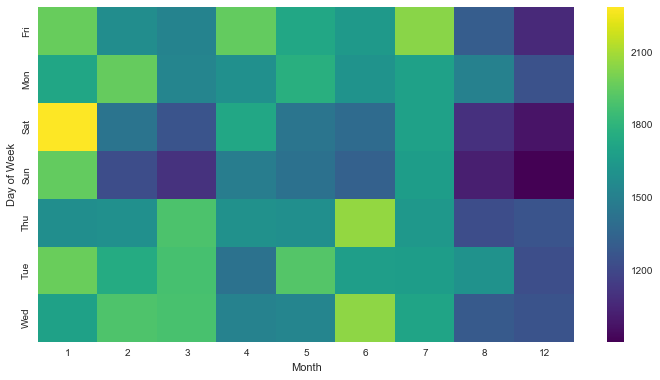

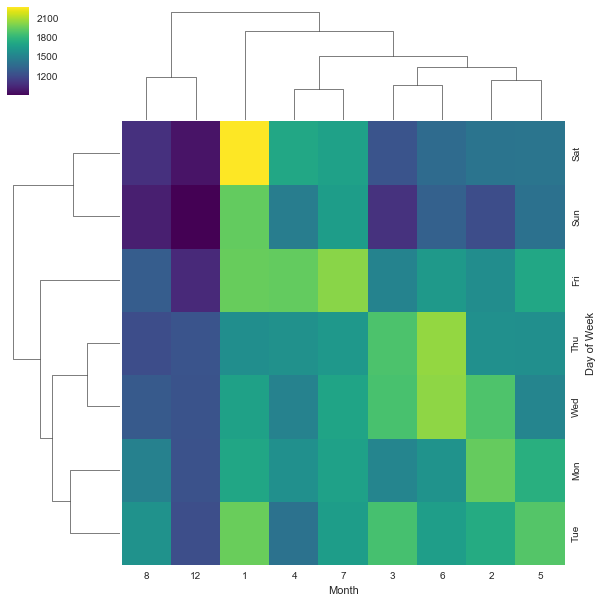

**Continue exploring the Data however you see fit!**
# END